Cole (2024), "Are there too many traits in our selection indices?"
=
This notebook is used to compute the correlated response to selection of 24 traits and composites for selection on each of 11 USDA selection indices. It does several things:
* Genetic and phenotypic correlation matrices provided by USDA-AGIL are converted into (co)variance matrices
* All economic values are convert to 2019 dollars (the index weights are invariant to these adjustments but it makes comparisons meaningful)
* Correlated responses are computed and trends over time are visualized.

Genetic and phenotypic correlations provided by USDA-AGIL: https://www.ars.usda.gov/arsuserfiles/80420530/publications/arr/nm8%20supplemental%20table_correlations_2021.txt.

In [537]:
import pandas as pd
import numpy as np
import seaborn as sns

In [538]:
np.set_printoptions(edgeitems=3)
np.set_printoptions(linewidth=180)

In [539]:
#Trait     1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18     19     20     21     22     23     24
#         MILK   FAT    PROT   PL     SCS    BWC    UDC    FLC    DPR    CA$    HCR    CCR    LIV    GL     HTH$   RFI    MFEV   DA     KET    MAS    MET    RPL    EFC    HLV
genCORR = np.array([
        [ 1.000,  0.399,  0.835,  0.113,  0.179, -0.131,  0.042, -0.100, -0.342,  0.089, -0.138, -0.219, -0.191, -0.235, -0.032, -0.008,  0.027,  0.104,  0.107, -0.209,  0.089, -0.065,  0.276,  0.194],
        [ 0.399,  1.000,  0.591,  0.090,  0.080, -0.115,  0.056, -0.025, -0.245,  0.205, -0.044, -0.123, -0.116, -0.198,  0.134, -0.020,  0.089,  0.194,  0.279, -0.106,  0.230,  0.014,  0.178,  0.194],
        [ 0.835,  0.591,  1.000,  0.128,  0.168, -0.100, -0.006, -0.121, -0.307,  0.133, -0.153, -0.176, -0.179, -0.267,  0.036, -0.005,  0.077,  0.145,  0.277, -0.194,  0.166, -0.075,  0.329,  0.169],
        [ 0.113,  0.090,  0.128,  1.000, -0.456, -0.221, -0.001, -0.008,  0.544,  0.363,  0.305,  0.629,  0.728, -0.136,  0.661, -0.078,  0.119,  0.498,  0.459,  0.496,  0.407,  0.218,  0.270,  0.398],
        [ 0.179,  0.080,  0.168, -0.456,  1.000, -0.192, -0.021,  0.016, -0.313, -0.066, -0.145, -0.299, -0.285, -0.073, -0.550, -0.124, -0.085, -0.164, -0.228, -0.725, -0.193, -0.187, -0.053, -0.182],
        [-0.131, -0.115, -0.100, -0.221, -0.192,  1.000,  0.098,  0.177, -0.024, -0.125, -0.097, -0.085, -0.207,  0.081,  0.002,  0.143,  0.080, -0.142,  0.016,  0.124, -0.030, -0.010, -0.024,  0.048],
        [ 0.042,  0.056, -0.006, -0.001, -0.021,  0.098,  1.000,  0.398, -0.195, -0.008,  0.010, -0.138, -0.286,  0.029,  0.044, -0.018,  0.118,  0.015,  0.143,  0.046,  0.010, -0.043, -0.175,  0.134],
        [-0.100, -0.025, -0.121, -0.008,  0.016,  0.177,  0.398,  1.000, -0.141,  0.003,  0.028, -0.157, -0.107,  0.062, -0.010, -0.105,  0.054,  0.052,  0.009,  0.035, -0.106, -0.067, -0.142,  0.071],
        [-0.342, -0.245, -0.307,  0.544, -0.313, -0.024, -0.195, -0.141,  1.000,  0.264,  0.514,  0.930,  0.485,  0.041,  0.342,  0.088,  0.004,  0.119,  0.154,  0.303,  0.270,  0.221,  0.293,  0.128],
        [ 0.089,  0.205,  0.133,  0.363, -0.066, -0.125, -0.008,  0.003,  0.264,  1.000,  0.176,  0.329,  0.198, -0.250,  0.249, -0.091,  0.103,  0.196,  0.222,  0.076,  0.284,  0.061,  0.211,  0.264],
        [-0.138, -0.044, -0.153,  0.305, -0.145, -0.097,  0.010,  0.028,  0.514,  0.176,  1.000,  0.599,  0.187,  0.163,  0.194,  0.016, -0.035,  0.120,  0.088,  0.163,  0.117,  0.122,  0.328,  0.165],
        [-0.219, -0.123, -0.176,  0.629, -0.299, -0.085, -0.138, -0.157,  0.930,  0.329,  0.599,  1.000,  0.488, -0.008,  0.411,  0.041,  0.030,  0.202,  0.224,  0.313,  0.334,  0.237,  0.299,  0.223],
        [-0.191, -0.116, -0.179,  0.728, -0.285, -0.207, -0.286, -0.107,  0.485,  0.198,  0.187,  0.488,  1.000, -0.049,  0.494, -0.069,  0.036,  0.429,  0.226,  0.384,  0.253,  0.200,  0.137,  0.202],
        [-0.235, -0.198, -0.267, -0.136, -0.073,  0.081,  0.029,  0.062,  0.041, -0.250,  0.163, -0.008, -0.049,  1.000, -0.121,  0.026, -0.083, -0.153, -0.196,  0.016, -0.158,  0.066, -0.265, -0.140],
        [-0.032,  0.134,  0.036,  0.661, -0.550,  0.002,  0.044, -0.010,  0.342,  0.249,  0.194,  0.411,  0.494, -0.121,  1.000,  0.032,  0.243,  0.690,  0.625,  0.676,  0.731,  0.497,  0.147,  0.300],
        [-0.008, -0.020, -0.005, -0.078, -0.124,  0.143, -0.018, -0.105,  0.088, -0.091,  0.016,  0.041, -0.069,  0.026,  0.032,  1.000,  0.052, -0.094,  0.000,  0.070,  0.056,  0.073,  0.008, -0.046],
        [ 0.027,  0.089,  0.077,  0.119, -0.085,  0.080,  0.118,  0.054,  0.004,  0.103, -0.035,  0.030,  0.036, -0.083,  0.243,  0.052,  1.000,  0.239,  0.294,  0.044,  0.212,  0.061, -0.061, -0.053],
        [ 0.104,  0.194,  0.145,  0.498, -0.164, -0.142,  0.015,  0.052,  0.119,  0.196,  0.120,  0.202,  0.429, -0.153,  0.690, -0.094,  0.239,  1.000,  0.587,  0.200,  0.396,  0.137,  0.157,  0.179],
        [ 0.107,  0.279,  0.277,  0.459, -0.228,  0.016,  0.143,  0.009,  0.154,  0.222,  0.088,  0.224,  0.226, -0.196,  0.625,  0.000,  0.294,  0.587,  1.000,  0.187,  0.515,  0.179,  0.130,  0.200],
        [-0.209, -0.106, -0.194,  0.496, -0.725,  0.124,  0.046,  0.035,  0.303,  0.076,  0.163,  0.313,  0.384,  0.016,  0.676,  0.070,  0.044,  0.200,  0.187,  1.000,  0.148,  0.135,  0.077,  0.287],
        [ 0.089,  0.230,  0.166,  0.407, -0.193, -0.030,  0.010, -0.106,  0.270,  0.284,  0.117,  0.334,  0.253, -0.158,  0.731,  0.056,  0.212,  0.396,  0.515,  0.148,  1.000,  0.637,  0.124,  0.166],
        [-0.065,  0.014, -0.075,  0.218, -0.187, -0.010, -0.043, -0.067,  0.221,  0.061,  0.122,  0.237,  0.200,  0.066,  0.497,  0.073,  0.061,  0.137,  0.179,  0.135,  0.637,  1.000, -0.067,  0.064],
        [ 0.276,  0.178,  0.329,  0.270, -0.053, -0.024, -0.175, -0.142,  0.293,  0.211,  0.328,  0.299,  0.137, -0.265,  0.147,  0.008, -0.061,  0.157,  0.130,  0.077,  0.124, -0.067,  1.000,  0.329],
        [ 0.194,  0.194,  0.169,  0.398, -0.182,  0.048,  0.134,  0.071,  0.128,  0.264,  0.165,  0.223,  0.202, -0.140,  0.300, -0.046, -0.053,  0.179,  0.200,  0.287,  0.166,  0.064,  0.329,  1.000],
])
genCORR.shape

(24, 24)

In [540]:
phenCORR = np.array([
        [ 1.000,  0.619,  0.901,  0.175, -0.159, -0.066,  0.006, -0.040, -0.094,  0.079, -0.004, -0.044, -0.027, -0.229,  0.030,  0.000, -0.006,  0.030,  0.013,  0.036,  0.029,  0.016,  0.009,  0.020],
        [ 0.619,  1.000,  0.723,  0.144, -0.167, -0.045, -0.014, -0.014, -0.075,  0.065, -0.005, -0.041, -0.019, -0.154,  0.101,  0.000,  0.002,  0.029,  0.016,  0.051,  0.027,  0.029,  0.011,  0.010],
        [ 0.901,  0.723,  1.000,  0.179, -0.148, -0.055, -0.022, -0.035, -0.078,  0.102, -0.007, -0.035, -0.022, -0.240,  0.103,  0.000, -0.007,  0.034,  0.028,  0.042,  0.029,  0.017,  0.012,  0.015],
        [ 0.175,  0.144,  0.179,  1.000, -0.163, -0.041, -0.000, -0.001,  0.102,  0.056,  0.037,  0.142,  0.222, -0.083,  0.215,  0.000,  0.008,  0.058,  0.073,  0.122,  0.065,  0.038,  0.063,  0.008],
        [-0.159, -0.167, -0.148, -0.163,  1.000,  0.005, -0.014, -0.010, -0.019, -0.040, -0.001, -0.026,  0.013, -0.004, -0.212,  0.000, -0.005, -0.011, -0.021, -0.206, -0.013, -0.005,  0.008, -0.010],
        [-0.066, -0.045, -0.055, -0.041,  0.005,  1.000,  0.103,  0.171, -0.009, -0.125, -0.017, -0.013, -0.010,  0.108, -0.121,  0.000,  0.001, -0.012, -0.009, -0.008, -0.008, -0.006, -0.012, -0.003],
        [ 0.006, -0.014, -0.022, -0.000, -0.014,  0.103,  1.000,  0.399, -0.031, -0.057, -0.004, -0.020, -0.012,  0.019, -0.111,  0.000, -0.005, -0.012, -0.004,  0.003, -0.008, -0.010, -0.019,  0.025],
        [-0.040, -0.014, -0.035, -0.001, -0.010,  0.171,  0.399,  1.000, -0.013, -0.045, -0.003, -0.013, -0.007,  0.104, -0.059,  0.000, -0.003, -0.008,  0.005, -0.003, -0.005,  0.001, -0.012,  0.009],
        [-0.094, -0.075, -0.078,  0.102, -0.019, -0.009, -0.031, -0.013,  1.000,  0.067,  0.064,  0.792, -0.075, -0.009,  0.120,  0.000,  0.005,  0.021,  0.025,  0.014,  0.035,  0.029,  0.041, -0.006],
        [ 0.079,  0.065,  0.102,  0.056, -0.040, -0.125, -0.057, -0.045,  0.067,  1.000,  0.023,  0.052,  0.006, -0.242,  0.310,  0.000, -0.002,  0.017,  0.009,  0.007,  0.011, -0.000,  0.035,  0.014],
        [-0.004, -0.005, -0.007,  0.037, -0.001, -0.017, -0.004, -0.003,  0.064,  0.023,  1.000,  0.047, -0.014, -0.048,  0.052,  0.000,  0.004, -0.002, -0.005, -0.001,  0.009,  0.008,  0.489,  0.001],
        [-0.044, -0.041, -0.035,  0.142, -0.026, -0.013, -0.020, -0.013,  0.792,  0.052,  0.047,  1.000, -0.073, -0.004,  0.107,  0.000,  0.003,  0.018,  0.023,  0.026,  0.041,  0.035,  0.016, -0.002],
        [-0.027, -0.019, -0.022,  0.222,  0.013, -0.010, -0.012, -0.007, -0.075,  0.006, -0.014, -0.073,  1.000, -0.017,  0.053,  0.000, -0.001,  0.021,  0.024,  0.009,  0.007,  0.005, -0.015, -0.001],
        [-0.229, -0.154, -0.240, -0.083, -0.004,  0.108,  0.019,  0.104, -0.009, -0.242, -0.048, -0.004, -0.017,  1.000, -0.169,  0.000, -0.006, -0.031, -0.029,  0.005, -0.023,  0.008, -0.148, -0.031],
        [ 0.030,  0.101,  0.103,  0.215, -0.212, -0.121, -0.111, -0.059,  0.120,  0.310,  0.052,  0.107,  0.053, -0.169,  1.000,  0.000,  0.036,  0.174,  0.100,  0.223,  0.157,  0.079,  0.085,  0.002],
        [ 0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000],
        [-0.006,  0.002, -0.007,  0.008, -0.005,  0.001, -0.005, -0.003,  0.005, -0.002,  0.004,  0.003, -0.001, -0.006,  0.036,  0.000,  1.000,  0.021,  0.093,  0.024,  0.081,  0.073, -0.003, -0.004],
        [ 0.030,  0.029,  0.034,  0.058, -0.011, -0.012, -0.012, -0.008,  0.021,  0.017, -0.002,  0.018,  0.021, -0.031,  0.174,  0.000,  0.021,  1.000,  0.218,  0.019,  0.092,  0.068, -0.006, -0.025],
        [ 0.013,  0.016,  0.028,  0.073, -0.021, -0.009, -0.004,  0.005,  0.025,  0.009, -0.005,  0.023,  0.024, -0.029,  0.100,  0.000,  0.093,  0.218,  1.000,  0.036,  0.161,  0.105, -0.018, -0.012],
        [ 0.036,  0.051,  0.042,  0.122, -0.206, -0.008,  0.003, -0.003,  0.014,  0.007, -0.001,  0.026,  0.009,  0.005,  0.223,  0.000,  0.024,  0.019,  0.036,  1.000,  0.044,  0.023, -0.007, -0.007],
        [ 0.029,  0.027,  0.029,  0.065, -0.013, -0.008, -0.008, -0.005,  0.035,  0.011,  0.009,  0.041,  0.007, -0.023,  0.157,  0.000,  0.081,  0.092,  0.161,  0.044,  1.000,  0.255, -0.002, -0.008],
        [ 0.016,  0.029,  0.017,  0.038, -0.005, -0.006, -0.010,  0.001,  0.029, -0.000,  0.008,  0.035,  0.005,  0.008,  0.079,  0.000,  0.073,  0.068,  0.105,  0.023,  0.255,  1.000, -0.001,  0.006],
        [ 0.009,  0.011,  0.012,  0.063,  0.008, -0.012, -0.019, -0.012,  0.041,  0.035,  0.489,  0.016, -0.015, -0.148,  0.085,  0.000, -0.003, -0.006, -0.018, -0.007, -0.002, -0.001,  1.000,  0.000],
        [ 0.020,  0.010,  0.015,  0.008, -0.010, -0.003,  0.025,  0.009, -0.006,  0.014,  0.001, -0.002, -0.001, -0.031,  0.002,  0.000, -0.004, -0.025, -0.012, -0.007, -0.008,  0.006,  0.000,  1.000],
])
phenCORR.shape

(24, 24)

Use SD of TTA to approximate genetic SD
---
Note that I multiply by 2 to go from a PTA basis to an EBV basis.

In [541]:
genSD = 2. * np.array([
    [713.88],
    [26.45],
    [18.49],
    [2.25],
    [0.20],
    [1.06],
    [0.84],
    [0.91],
    [2.31],
    [14.00],
    [2.38],
    [2.78],
    [2.22],
    [1.43],
    [8.50],
    [209.00],
    [0.20],
    [0.50],
    [0.50],
    [1.70],
    [0.80],
    [0.40],
    [2.75],
    [0.80],
])

Backsolve for genetic (co)variance matrix from genetic correlations and SD
---

In [542]:
heritabilities = np.array([
    [0.20],
    [0.20],
    [0.20],
    [0.08],
    [0.12],
    [0.40],
    [0.27],
    [0.15],
    [0.04],
    [0.07],
    [0.01],
    [0.02],
    [0.013],
    [0.11],
    [0.01],
    [0.14],
    [0.006],
    [0.011],
    [0.012],
    [0.031],
    [0.014],
    [0.010],
    [0.027],
    [0.007],
])

In [543]:
#Trait     1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18     19     20     21     22     23     24
#         MILK   FAT    PROT   PL     SCS    BWC    UDC    FLC    DPR    CA$    HCR    CCR    LIV    GL     HTH$   RFI    MFEV   DA     KET    MAS    MET    RPL    EFC    HLV
# Index trait names to their row/column in the "master" correlation matrices because we'll
# need to extract submatrices later, and it's too difficult to keep it all in my head.
tidx = {'MILK': 0, 'FAT': 1,  'PROT': 2,  'PL': 3,    'SCS': 4,   'BWC': 5, 'UDC': 6,  'FLC': 7,  'DPR': 8,   'CA$': 9,   'HCR': 10,  'CCR': 11, 'LIV': 12, 'GL': 13,  'HTH$': 14,
        'RFI': 15, 'MFEV': 16, 'DA': 17, 'KET': 18, 'MAS': 19, 'MET': 20,  'RPL': 21,  'EFC': 22,  'HLV': 23}

It'e easy to get too clever here by half. So, before we do anything else, we're going to convert the full 24-by-24 correlation matrices to (co)variance matrices. Only after that's done will we worry about subsetting and rearranging to get P, G, and C that are properly dimensioned.

In [544]:
genCOV = np.multiply(genSD.T*genSD, genCORR)
print(genCOV[0:8, 0:8])

[[ 2.03849862e+06  3.01358731e+04  4.40868016e+04  7.26015960e+02  1.02227616e+02 -3.96517507e+02  1.00742746e+02 -2.59852320e+02]
 [ 3.01358731e+04  2.79841000e+03  1.15613902e+03  2.14245000e+01  1.69280000e+00 -1.28970200e+01  4.97683200e+00 -2.40695000e+00]
 [ 4.40868016e+04  1.15613902e+03  1.36752040e+03  2.13004800e+01  2.48505600e+00 -7.83976000e+00 -3.72758400e-01 -8.14373560e+00]
 [ 7.26015960e+02  2.14245000e+01  2.13004800e+01  2.02500000e+01 -8.20800000e-01 -2.10834000e+00 -7.56000000e-03 -6.55200000e-02]
 [ 1.02227616e+02  1.69280000e+00  2.48505600e+00 -8.20800000e-01  1.60000000e-01 -1.62816000e-01 -1.41120000e-02  1.16480000e-02]
 [-3.96517507e+02 -1.28970200e+01 -7.83976000e+00 -2.10834000e+00 -1.62816000e-01  4.49440000e+00  3.49036800e-01  6.82936800e-01]
 [ 1.00742746e+02  4.97683200e+00 -3.72758400e-01 -7.56000000e-03 -1.41120000e-02  3.49036800e-01  2.82240000e+00  1.21692480e+00]
 [-2.59852320e+02 -2.40695000e+00 -8.14373560e+00 -6.55200000e-02  1.16480000e-02  

Things are a little trickier for the phenotypic (co)variance matrix because we have to use the square roots of the heritabilities to expand the genetic SD to phenotypic SD.

In [545]:
phenSD = genSD / np.sqrt(heritabilities)
phenCOV = np.multiply(phenSD.T*phenSD, phenCORR)
print(phenCOV[0:8, 0:8])

[[ 1.01924931e+07  2.33760720e+05  2.37857534e+05  8.88885418e+03 -5.86147214e+02 -7.06301313e+02  6.19325359e+01 -6.00103228e+02]
 [ 2.33760720e+05  1.39920500e+04  7.07181483e+03  2.71000871e+02 -2.28100645e+01 -1.78426375e+01 -5.35421874e+00 -7.78205809e+00]
 [ 2.37857534e+05  7.07181483e+03  6.83760200e+03  2.35489995e+02 -1.41313285e+01 -1.52447555e+01 -5.88168808e+00 -1.36002131e+01]
 [ 8.88885418e+03  2.71000871e+02  2.35489995e+02  2.53125000e+02 -2.99450121e+00 -2.18653907e+00 -0.00000000e+00 -7.47641291e-02]
 [-5.86147214e+02 -2.28100645e+01 -1.41313285e+01 -2.99450121e+00  1.33333333e+00  1.93528637e-02 -5.22666667e-02 -5.42619163e-02]
 [-7.06301313e+02 -1.78426375e+01 -1.52447555e+01 -2.18653907e+00  1.93528637e-02  1.12360000e+01  1.11627318e+00  2.69356670e+00]
 [ 6.19325359e+01 -5.35421874e+00 -5.88168808e+00 -0.00000000e+00 -5.22666667e-02  1.11627318e+00  1.04533333e+01  6.06214128e+00]
 [-6.00103228e+02 -7.78205809e+00 -1.36002131e+01 -7.47641291e-02 -5.42619163e-02  

In [546]:
print(phenSD)

[[3.19256842e+03]
 [1.18287996e+02]
 [8.26897938e+01]
 [1.59099026e+01]
 [1.15470054e+00]
 [3.35201432e+00]
 [3.23316151e+00]
 [4.69921979e+00]
 [2.31000000e+01]
 [1.05830052e+02]
 [4.76000000e+01]
 [3.93151370e+01]
 [3.89413761e+01]
 [8.62322445e+00]
 [1.70000000e+02]
 [1.11715199e+03]
 [5.16397779e+00]
 [9.53462589e+00]
 [9.12870929e+00]
 [1.93107024e+01]
 [1.35224681e+01]
 [8.00000000e+00]
 [3.34719341e+01]
 [1.91236577e+01]]


$P$ is a 17-by-17 matrix of phenotypic (co)variances for traits in the selection index

In [547]:
P = np.zeros((17, 17))
P[0:13, 0:13]    = phenCOV[0:13, 0:13]      # M, F, P, PL, SCS, BWC, UDC, FLC, DPR, CA$, HCR, CCR, LIV
P[0:13, 13:15]   = phenCOV[0:13, 14:16]
P[13:15, 0:13]   = phenCOV[14:16, 0:13]
P[13, 13]        = phenCOV[14, 14]          # HTH$
P[14, 14]        = phenCOV[15, 15]          # RFI
P[13, 14]        = phenCOV[14, 15]
P[14, 13]        = phenCOV[15, 14]
P[0:13, 15:17]   = phenCOV[0:13, 22:24]
P[15:17, 0:13]   = phenCOV[22:24, 0:13]
P[13:15, 15:17]  = phenCOV[14:16, 22:24]    # EFC, HLV
P[15:17, 13:15]  = phenCOV[22:24, 14:16]
P[15:17, 15:17]  = phenCOV[22:24, 22:24]
print(P[0:9, 0:9])

[[ 1.01924931e+07  2.33760720e+05  2.37857534e+05  8.88885418e+03 -5.86147214e+02 -7.06301313e+02  6.19325359e+01 -6.00103228e+02 -6.93234306e+03]
 [ 2.33760720e+05  1.39920500e+04  7.07181483e+03  2.71000871e+02 -2.28100645e+01 -1.78426375e+01 -5.35421874e+00 -7.78205809e+00 -2.04933953e+02]
 [ 2.37857534e+05  7.07181483e+03  6.83760200e+03  2.35489995e+02 -1.41313285e+01 -1.52447555e+01 -5.88168808e+00 -1.36002131e+01 -1.48990470e+02]
 [ 8.88885418e+03  2.71000871e+02  2.35489995e+02  2.53125000e+02 -2.99450121e+00 -2.18653907e+00 -0.00000000e+00 -7.47641291e-02  3.74869125e+01]
 [-5.86147214e+02 -2.28100645e+01 -1.41313285e+01 -2.99450121e+00  1.33333333e+00  1.93528637e-02 -5.22666667e-02 -5.42619163e-02 -5.06798066e-01]
 [-7.06301313e+02 -1.78426375e+01 -1.52447555e+01 -2.18653907e+00  1.93528637e-02  1.12360000e+01  1.11627318e+00  2.69356670e+00 -6.96883777e-01]
 [ 6.19325359e+01 -5.35421874e+00 -5.88168808e+00 -0.00000000e+00 -5.22666667e-02  1.11627318e+00  1.04533333e+01  6.0

$G$ is a 17-by-24 matrix of genetic (co)variances of the traits in the index with the traits to be improved.

In [548]:
G = np.zeros((17, 24))
G[0:13, :]  = genCOV[0:13, :]    # M F P ... LIV
G[13:15, :] = genCOV[14:16, :]   # HTH$ and RFI
G[15:17, :] = genCOV[22:24, :]   # EFC and HLIV
print(G[0:9, 0:9])

[[ 2.03849862e+06  3.01358731e+04  4.40868016e+04  7.26015960e+02  1.02227616e+02 -3.96517507e+02  1.00742746e+02 -2.59852320e+02 -2.25591791e+03]
 [ 3.01358731e+04  2.79841000e+03  1.15613902e+03  2.14245000e+01  1.69280000e+00 -1.28970200e+01  4.97683200e+00 -2.40695000e+00 -5.98775100e+01]
 [ 4.40868016e+04  1.15613902e+03  1.36752040e+03  2.13004800e+01  2.48505600e+00 -7.83976000e+00 -3.72758400e-01 -8.14373560e+00 -5.24502132e+01]
 [ 7.26015960e+02  2.14245000e+01  2.13004800e+01  2.02500000e+01 -8.20800000e-01 -2.10834000e+00 -7.56000000e-03 -6.55200000e-02  1.13097600e+01]
 [ 1.02227616e+02  1.69280000e+00  2.48505600e+00 -8.20800000e-01  1.60000000e-01 -1.62816000e-01 -1.41120000e-02  1.16480000e-02 -5.78424000e-01]
 [-3.96517507e+02 -1.28970200e+01 -7.83976000e+00 -2.10834000e+00 -1.62816000e-01  4.49440000e+00  3.49036800e-01  6.82936800e-01 -2.35065600e-01]
 [ 1.00742746e+02  4.97683200e+00 -3.72758400e-01 -7.56000000e-03 -1.41120000e-02  3.49036800e-01  2.82240000e+00  1.2

$C$ is a 24-by-24 genetic (co)variance matrix for the traits to be improved

In [549]:
C = genCOV
print(C[0:8, 0:8])

[[ 2.03849862e+06  3.01358731e+04  4.40868016e+04  7.26015960e+02  1.02227616e+02 -3.96517507e+02  1.00742746e+02 -2.59852320e+02]
 [ 3.01358731e+04  2.79841000e+03  1.15613902e+03  2.14245000e+01  1.69280000e+00 -1.28970200e+01  4.97683200e+00 -2.40695000e+00]
 [ 4.40868016e+04  1.15613902e+03  1.36752040e+03  2.13004800e+01  2.48505600e+00 -7.83976000e+00 -3.72758400e-01 -8.14373560e+00]
 [ 7.26015960e+02  2.14245000e+01  2.13004800e+01  2.02500000e+01 -8.20800000e-01 -2.10834000e+00 -7.56000000e-03 -6.55200000e-02]
 [ 1.02227616e+02  1.69280000e+00  2.48505600e+00 -8.20800000e-01  1.60000000e-01 -1.62816000e-01 -1.41120000e-02  1.16480000e-02]
 [-3.96517507e+02 -1.28970200e+01 -7.83976000e+00 -2.10834000e+00 -1.62816000e-01  4.49440000e+00  3.49036800e-01  6.82936800e-01]
 [ 1.00742746e+02  4.97683200e+00 -3.72758400e-01 -7.56000000e-03 -1.41120000e-02  3.49036800e-01  2.82240000e+00  1.21692480e+00]
 [-2.59852320e+02 -2.40695000e+00 -8.14373560e+00 -6.55200000e-02  1.16480000e-02  

Gstar is a 17-by-17 genetic (co)variance matrix for the traits in the index.

In [550]:
Gstar = np.zeros((17, 17))
Gstar[0:13, 0:13]    = genCOV[0:13, 0:13]
Gstar[0:13, 13:15]   = genCOV[0:13, 14:16]
Gstar[13:15, 0:13]   = genCOV[14:16, 0:13]
Gstar[13, 13]        = genCOV[14, 14]
Gstar[14, 14]        = genCOV[15, 15]
Gstar[13, 14]        = genCOV[14, 15]
Gstar[14, 13]        = genCOV[15, 14]
Gstar[0:13, 15:17]   = genCOV[0:13, 22:24]
Gstar[15:17, 0:13]   = genCOV[22:24, 0:13]
Gstar[13:15, 15:17]  = genCOV[14:16, 22:24]
Gstar[15:17, 13:15]  = genCOV[22:24, 14:16]
Gstar[15:17, 15:17]  = genCOV[22:24, 22:24]
print(Gstar[0:9, 0:9])

[[ 2.03849862e+06  3.01358731e+04  4.40868016e+04  7.26015960e+02  1.02227616e+02 -3.96517507e+02  1.00742746e+02 -2.59852320e+02 -2.25591791e+03]
 [ 3.01358731e+04  2.79841000e+03  1.15613902e+03  2.14245000e+01  1.69280000e+00 -1.28970200e+01  4.97683200e+00 -2.40695000e+00 -5.98775100e+01]
 [ 4.40868016e+04  1.15613902e+03  1.36752040e+03  2.13004800e+01  2.48505600e+00 -7.83976000e+00 -3.72758400e-01 -8.14373560e+00 -5.24502132e+01]
 [ 7.26015960e+02  2.14245000e+01  2.13004800e+01  2.02500000e+01 -8.20800000e-01 -2.10834000e+00 -7.56000000e-03 -6.55200000e-02  1.13097600e+01]
 [ 1.02227616e+02  1.69280000e+00  2.48505600e+00 -8.20800000e-01  1.60000000e-01 -1.62816000e-01 -1.41120000e-02  1.16480000e-02 -5.78424000e-01]
 [-3.96517507e+02 -1.28970200e+01 -7.83976000e+00 -2.10834000e+00 -1.62816000e-01  4.49440000e+00  3.49036800e-01  6.82936800e-01 -2.35065600e-01]
 [ 1.00742746e+02  4.97683200e+00 -3.72758400e-01 -7.56000000e-03 -1.41120000e-02  3.49036800e-01  2.82240000e+00  1.2

In [551]:
GCORRstar = np.zeros((17, 17))
GCORRstar[0:13, 0:13]    = genCORR[0:13, 0:13]
GCORRstar[0:13, 13:15]   = genCORR[0:13, 14:16]
GCORRstar[13:15, 0:13]   = genCORR[14:16, 0:13]
GCORRstar[13, 13]        = genCORR[14, 14]
GCORRstar[14, 14]        = genCORR[15, 15]
GCORRstar[13, 14]        = genCORR[14, 15]
GCORRstar[14, 13]        = genCORR[15, 14]
GCORRstar[0:13, 15:17]   = genCORR[0:13, 22:24]
GCORRstar[15:17, 0:13]   = genCORR[22:24, 0:13]
GCORRstar[13:15, 15:17]  = genCORR[14:16, 22:24]
GCORRstar[15:17, 13:15]  = genCORR[22:24, 14:16]
GCORRstar[15:17, 15:17]  = genCORR[22:24, 22:24]
np.save('genetic_correlation_matrix.npy', GCORRstar)
print(GCORRstar[0:9, 0:9])

[[ 1.     0.399  0.835  0.113  0.179 -0.131  0.042 -0.1   -0.342]
 [ 0.399  1.     0.591  0.09   0.08  -0.115  0.056 -0.025 -0.245]
 [ 0.835  0.591  1.     0.128  0.168 -0.1   -0.006 -0.121 -0.307]
 [ 0.113  0.09   0.128  1.    -0.456 -0.221 -0.001 -0.008  0.544]
 [ 0.179  0.08   0.168 -0.456  1.    -0.192 -0.021  0.016 -0.313]
 [-0.131 -0.115 -0.1   -0.221 -0.192  1.     0.098  0.177 -0.024]
 [ 0.042  0.056 -0.006 -0.001 -0.021  0.098  1.     0.398 -0.195]
 [-0.1   -0.025 -0.121 -0.008  0.016  0.177  0.398  1.    -0.141]
 [-0.342 -0.245 -0.307  0.544 -0.313 -0.024 -0.195 -0.141  1.   ]]


In [552]:
ch4_genCORR = np.zeros((14, 14))
ch4_phenCORR = np.zeros((14, 14))

I want the correlated response to selection of traits in $y$, including the traits not in the index:

$$CR=i\times\frac{b^\intercal G}{\sqrt{b^\intercal{Pb}}}$$

where i = selection differential, and the other variables are defined as above. I used a value for i of 0.35
for comparability with 2021 Net Merit.

For each historical index, I:
1. Find the economic values for the traits in that index
2. Adjust the values to 2019 dollars, using these values: https://liberalarts.oregonstate.edu/spp/polisci/research/inflation-conversion-factors-convert-dollars-1774-estimated-2024-dollars-recent-year,
       local copy saved as "Copy of infcf17742018.xlsx")
3. Construct G from values in gen
4. Construct b from the economic values gathered in Step 1 and adjusted in Step 2
5. Construct a from the economic values currently used on NM$
6. Construct C from the values in gen
7. Construct P from the values in phen
8. Solve for CR

2021 Lifetime Net Merit
===
Source: P.M. VanRaden et al. 2021. Net merit as a measure of lifetime profit: 2021 revision. https://www.ars.usda.gov/ARSUserFiles/80420530/Publications/ARR/nmcalc-2021_ARR-NM8.pdf.

$$NM_{2021} = 0.002(PTA_{Milk} + 4.18(PTA_{fat}) + 4.67(PTA_{protein}) + 34(PTA_{PL}) − 74(PTA_{SCS} − 3.00) − 45(PTA_{body weight composite}) + 19(PTA_{udder composite}) + 3(PTA_{feet-legs composite}) + 11(PTA_{DPR}) + 1(PTA_{calving ability dollars}) + 1.1(PTA_{HCR}) + 2.2(PTA_{CCR}) + 9.8(PTA_{LIV}) + 1(PTA_{HTH\$}) - 0.30(PTA_{RFI}) + 2.1(PTA_{EFC}) + 5.0(PTA_{HLIV}).$$

In [553]:
# Economic values adjusted to 2017 values using CPI-U-X1 CF 2017$).
# I changed the equation above and the order of traits in b to match the order used in the (co)variance
# matrices.
b_2021 = np.array([ [0.002], [4.18], [4.67], [34.00], [-74.00], [-45.00], [19.00], [3.00], [11.00], [1.00],
                    [1.10], [2.20], [9.80], [1.00], [-0.30], [2.10], [5.00] ])
#b_2021 = b_2021 / 1.092
b_2021.T

array([[ 2.00e-03,  4.18e+00,  4.67e+00,  3.40e+01, -7.40e+01, -4.50e+01,  1.90e+01,  3.00e+00,  1.10e+01,  1.00e+00,  1.10e+00,  2.20e+00,  9.80e+00,  1.00e+00, -3.00e-01,
         2.10e+00,  5.00e+00]])

In [554]:
P.shape

(17, 17)

In [555]:
G.shape

(17, 24)

In [556]:
# Now we need to multiply through to get the correlated response to selection on the index for all traits in the
# selection objective (aggregate genotype).
CR_2021 = np.linalg.multi_dot( [ b_2021.T, G ] ) / \
          np.sqrt(
                np.linalg.multi_dot( [b_2021.T, P, b_2021] )
                )
CR_2021.shape

(1, 24)

## for k, v in tidx.items():
    print('{0}\t{1}'.format(k, CR_2021[0,v]))

In [557]:
# Create an empty dataframe
responses = pd.DataFrame()

In [558]:
responses['trait'] = tidx.keys()
responses['year'] = 2021
responses['response'] = CR_2021.T
responses.head()

,trait,year,response
0,MILK,2021,250.539258
1,FAT,2021,13.322546
2,PROT,2021,8.487930
3,PL,2021,1.109139
4,SCS,2021,-0.019036


In [559]:
index_heritabilities = pd.DataFrame()

The heritability of each index, h_I^2, was calculated as (e.g., Lin and Allaire, 1977):

$$h_{I}^{2} = \frac{b'Gb}{b'Pb}$$

In [560]:
h2_2021 = np.linalg.multi_dot( [b_2021.T, Gstar, b_2021] ) / np.linalg.multi_dot( [b_2021.T, P, b_2021] )
print(h2_2021)

[[0.13408026]]


In [561]:
#index_heritabilities = index_heritabilities.append({'year': '2021', 'heritability': h2_2021[0][0]}, ignore_index=True)
index_heritabilities = pd.concat([index_heritabilities, pd.DataFrame([{'year': '2021', 'heritability': h2_2021[0][0]}])], ignore_index=True)
index_heritabilities.head()

,year,heritability
0,2021,0.13408


2018 Lifetime Net Merit
===
Source: P.M. VanRaden et al. 2018. Net merit as a measure of lifetime profit: 2018 revision. https://aipl.arsusda.gov/reference/nmcalc-2018.htm.

$$NM_{2018} = -0.004(PTA_{Milk} + 4.03(PTA_{fat}) + 3.53(PTA_{protein}) + 19(PTA_{PL}) − 72(PTA_{SCS} − 3.00) − 18(PTA_{body weight composite}) + 31(PTA_{ udder composite}) + 10(PTA_{feet-legs composite}) + 11(PTA_{DPR}) + 1(PTA_{calving ability dollars}) + 2.2(PTA_{HCR}) + 2.2(PTA_{CCR}) + 12(PTA_{LIV}) + 1(PTA_{HTH\$}).$$

In [562]:
# Economic values adjusted to 2017 values using CPI-U-X1 CF 2017$).
# I changed the equation above and the order of traits in b to match the order used in the (co)variance
# matrices.
b_2018 = np.array([ [-0.004], [4.03], [3.53], [19.00], [-72.00], [-18.00], [31.00], [10.00], [11.00], [1.00],
                    [2.20], [2.20], [12.00], [1.00] ])
#b_2018 = b_2018 / 1.020
b_2018.T

array([[-4.00e-03,  4.03e+00,  3.53e+00,  1.90e+01, -7.20e+01, -1.80e+01,  3.10e+01,  1.00e+01,  1.10e+01,  1.00e+00,  2.20e+00,  2.20e+00,  1.20e+01,  1.00e+00]])

In [563]:
# Now we need to multiply through to get the correlated response to selection on the index for all traits in the
# selection objective (aggregate genotype).
CR_2018 = np.linalg.multi_dot( [ b_2018.T, G[0:14, :] ] ) / \
          np.sqrt(
                np.linalg.multi_dot( [b_2018.T, P[0:14, 0:14], b_2018] )
                )
CR_2018.shape

(1, 24)

In [564]:
for k, v in tidx.items():
    print('{0}\t{1}'.format(k, CR_2018[0,v]))

MILK	217.8835316658081
FAT	13.785350737140378
PROT	7.8580096583773305
PL	0.9816068752102743
SCS	-0.02563752755888714
BWC	-0.18777478578828208
UDC	0.06209878011227098
FLC	-0.006766558416852649
DPR	0.25103322428455893
CA$	4.056816340253077
HCR	0.2954504433173684
CCR	0.5821912505132522
LIV	0.45964718883703204
GL	-0.2426535701251097
HTH$	2.811063118407378
RFI	-6.365225165495859
MFEV	0.019819190322793917
DA	0.14852990714797995
KET	0.1704644890016015
MAS	0.2151714711211146
MET	0.23647005958215572
RPL	0.03676023211455245
EFC	0.6517538713706369
HLV	0.20612190113790635


In [565]:
resp2018 = pd.DataFrame()
resp2018['trait'] = tidx.keys()
resp2018['year'] = 2018
resp2018['response'] = CR_2018.T
responses = pd.concat([responses, pd.DataFrame(resp2018)], ignore_index=True)

In [566]:
print(responses)

   trait  year    response
0   MILK  2021  250.539258
1    FAT  2021   13.322546
2   PROT  2021    8.487930
3     PL  2021    1.109139
4    SCS  2021   -0.019036
5    BWC  2021   -0.304206
6    UDC  2021    0.017899
7    FLC  2021   -0.038345
8    DPR  2021    0.244711
9    CA$  2021    4.373814
10   HCR  2021    0.287379
11   CCR  2021    0.611404
12   LIV  2021    0.565682
13    GL  2021   -0.275865
14  HTH$  2021    2.785263
15   RFI  2021  -47.226027
16  MFEV  2021    0.015122
17    DA  2021    0.164099
18   KET  2021    0.169267
19   MAS  2021    0.185736
20   MET  2021    0.229985
21   RPL  2021    0.030684
22   EFC  2021    0.740831
23   HLV  2021    0.220641
24  MILK  2018  217.883532
25   FAT  2018   13.785351
26  PROT  2018    7.858010
27    PL  2018    0.981607
28   SCS  2018   -0.025638
29   BWC  2018   -0.187775
30   UDC  2018    0.062099
31   FLC  2018   -0.006767
32   DPR  2018    0.251033
33   CA$  2018    4.056816
34   HCR  2018    0.295450
35   CCR  2018    0.582191
3

In [567]:
h2_2018 = np.linalg.multi_dot( [b_2018.T, Gstar[0:14, 0:14], b_2018] ) / np.linalg.multi_dot( [b_2018.T, P[0:14,0:14], b_2018] )
print(h2_2018)

[[0.11342475]]


In [568]:
index_heritabilities = pd.concat([index_heritabilities, pd.DataFrame([{'year': '2018', 'heritability': h2_2018[0][0]}])], ignore_index=True)
index_heritabilities.head()

,year,heritability
0,2021,0.134080
1,2018,0.113425


2017 Lifetime Net Merit
===
Source: P.M. VanRaden. 2017. Net merit as a measure of lifetime profit: 2017 revision. https://aipl.arsusda.gov/reference/nmcalc-2017.htm.

$$NM_{2017} = -0.004(PTA_{Milk} + 3.56(PTA_{fat}) + 3.81(PTA_{protein}) + 21(PTA_{PL}) − 117(PTA_{SCS} − 3.00) − 20(PTA_{body weight composite}) + 31(PTA_{udder composite}) + 10(PTA_{feet-legs composite}) + 11(PTA_{DPR}) + 1.0(PTA_{calving ability dollars}) + 2.2(PTA_{HCR}) + 2.2(PTA_{CCR}) + 12(PTA_{LIV}).$$

In [569]:
b_2017 = np.array([ [-0.004], [3.56], [3.8], [21.00], [-117.00], [-20.00], [31.00], [10.00], [11.00],
                    [1.00], [2.20], [2.20], [12.00] ])

In [570]:
CR_2017 = np.linalg.multi_dot( [ b_2017.T, G[0:13, :] ] ) / \
          np.sqrt(
                np.linalg.multi_dot( [b_2017.T, P[0:13, 0:13], b_2017] )
                )
CR_2017.shape

(1, 24)

In [571]:
for k, v in tidx.items():
    print('{0}\t{1}'.format(k, CR_2017[0,v]))

MILK	223.2110826883442
FAT	13.284880755573125
PROT	7.944652961895337
PL	1.0471557877083209
SCS	-0.03131117042411373
BWC	-0.19737713231438497
UDC	0.06108977390114527
FLC	-0.009664978139137722
DPR	0.2955118847521637
CA$	4.143755318611863
HCR	0.31671483253637644
CCR	0.6360719084939815
LIV	0.500537434232191
GL	-0.2416678515529929
HTH$	2.860269516592491
RFI	-6.300652400868054
MFEV	0.01938343787670417
DA	0.14796324031741404
KET	0.17121408982121955
MAS	0.24386699063081496
MET	0.23226496810822775
RPL	0.03512005356895263
EFC	0.677719624140777
HLV	0.21220019650868702


In [572]:
resp2017 = pd.DataFrame()
resp2017['trait'] = tidx.keys()
resp2017['year'] = 2017
resp2017['response'] = CR_2017.T
responses = pd.concat([responses, pd.DataFrame(resp2017)], ignore_index=True)

In [573]:
print(responses)

   trait  year    response
0   MILK  2021  250.539258
1    FAT  2021   13.322546
2   PROT  2021    8.487930
3     PL  2021    1.109139
4    SCS  2021   -0.019036
..   ...   ...         ...
67   MAS  2017    0.243867
68   MET  2017    0.232265
69   RPL  2017    0.035120
70   EFC  2017    0.677720
71   HLV  2017    0.212200

[72 rows x 3 columns]


In [574]:
h2_2017 = np.linalg.multi_dot( [b_2017.T, Gstar[0:13, 0:13], b_2017] ) / np.linalg.multi_dot( [b_2017.T, P[0:13,0:13], b_2017] )
index_heritabilities = pd.concat([index_heritabilities, pd.DataFrame([{'year': '2017', 'heritability': h2_2017[0][0]}])], ignore_index=True)
index_heritabilities.head()

,year,heritability
0,2021,0.134080
1,2018,0.113425
2,2017,0.116437


2014 Lifetime Net Merit
====
Source: P.M. VanRaden and J.B. Cole. 2014. Net merit as a measure of lifetime profit: 2014 revision. https://aipl.arsusda.gov/reference/nmcalc-2014.htm.

$$NM_{2014} = -0.006(PTA_{Milk} + 3.22(PTA_{fat}) + 4.14(PTA_{protein}) + 29(PTA_{PL}) − 122(PTA_{SCS} − 3.00) − 16(PTA_{body size composite}) + 31(PTA_{udder composite}) + 10(PTA_{feet-legs composite}) + 11(PTA_{DPR}) + 1.0(PTA_{calving ability dollars}) + 2.3(PTA_{HCR}) + 2.2(PTA_{CCR}).$$

In [575]:
b_2014 = np.array([ [-0.006], [3.22], [4.14], [29.00], [-122.00], [-16.00], [31.00], [10.00], [11.00], [1.00],
                    [2.30], [2.20] ])
#b_2014 = b_2014 / 0.966
b_2014.T

array([[-6.00e-03,  3.22e+00,  4.14e+00,  2.90e+01, -1.22e+02, -1.60e+01,  3.10e+01,  1.00e+01,  1.10e+01,  1.00e+00,  2.30e+00,  2.20e+00]])

In [576]:
CR_2014 = np.linalg.multi_dot( [ b_2014.T, G[0:12, :] ] ) / \
          np.sqrt(
                np.linalg.multi_dot( [b_2014.T, P[0:12, 0:12], b_2014] )
                )
CR_2014.shape

(1, 24)

In [577]:
for k, v in tidx.items():
    print('{0}\t{1}'.format(k, CR_2014[0,v]))

MILK	255.10071769426204
FAT	13.883931406083084
PROT	8.870746652141348
PL	1.090968430677094
SCS	-0.03505320113859399
BWC	-0.18129529441097178
UDC	0.0896285196023073
FLC	0.0008669159916454327
DPR	0.29411192431629657
CA$	4.370488535846063
HCR	0.336369084321642
CCR	0.659165125491001
LIV	0.40676951691272745
GL	-0.25728698216425655
HTH$	2.9742621396403894
RFI	-5.562259230186329
MFEV	0.021515269581395238
DA	0.14895479567549696
KET	0.18453904525011658
MAS	0.2583236906403504
MET	0.2443972065059551
RPL	0.0344114240303064
EFC	0.7319403940921984
HLV	0.22865015780502923


In [578]:
resp2014 = pd.DataFrame()
resp2014['trait'] = tidx.keys()
resp2014['year'] = 2014
resp2014['response'] = CR_2014.T
responses = pd.concat([responses, pd.DataFrame(resp2014)], ignore_index=True)

In [579]:
h2_2014 = np.linalg.multi_dot( [b_2014.T, Gstar[0:12, 0:12], b_2014] ) / np.linalg.multi_dot( [b_2014.T, P[0:12,0:12], b_2014] )
index_heritabilities = pd.concat([index_heritabilities, pd.DataFrame([{'year': '2014', 'heritability': h2_2014[0][0]}])], ignore_index=True)
index_heritabilities.head()

,year,heritability
0,2021,0.134080
1,2018,0.113425
2,2017,0.116437
3,2014,0.131108


2010 Lifetime Net Merit
====
Source: J.B. Cole, P.M. VanRaden, and Multi-State Project S-1040. 2010. Net merit as a measure of lifetime profit: 2010 revision. https://aipl.arsusda.gov/reference/nmcalc-2010.htm.

$$NM_{2010} = 0.001(PTA_{Milk}) + 2.89(PTA_{fat}) + 3.41(PTA_{protein}) + 35(PTA_{PL}) − 182(PTA_{SCS} − 3.00) − 23(PTA_{body size composite}) + 32(PTA_{udder composite}) + 15(PTA_{feet-legs composite}) + 27(PTA_{DPR}) + 1.0(PTA_{calving ability dollars}).$$

In [580]:
# Economic values adjusted to 2017 values using CPI-U-X1 CF 2017$).
# I changed the equation above and the order of traits in b to match the order used in the (co)variance
# matrices.
b_2010 = np.array([ [0.001], [2.89], [3.41], [35.00], [-182.00], [-23.00], [32.00], [15.00], [27.00], [1.00] ])
#b_2010 = b_2010 / 0.890
b_2010.T

array([[ 1.00e-03,  2.89e+00,  3.41e+00,  3.50e+01, -1.82e+02, -2.30e+01,  3.20e+01,  1.50e+01,  2.70e+01,  1.00e+00]])

In [581]:
CR_2010 = np.linalg.multi_dot( [ b_2010.T, G[0:10, :] ] ) / \
          np.sqrt(
                np.linalg.multi_dot( [b_2010.T, P[0:10, 0:10], b_2010] )
                )
CR_2010.shape

(1, 24)

In [582]:
for k, v in tidx.items():
    print('{0}\t{1}'.format(k, CR_2010[0,v]))

MILK	169.6414317920822
FAT	9.977785957230639
PROT	6.110880404691287
PL	1.1962718223285078
SCS	-0.04922354911548678
BWC	-0.1755895532406445
UDC	0.06430810385296158
FLC	0.0014293360309581113
DPR	0.5987435777163781
CA$	4.2572739619745485
HCR	0.43962366459889834
CCR	0.9423326846523667
LIV	0.5826282845563253
GL	-0.20394645505699452
HTH$	3.2256650768275614
RFI	-3.353926953675817
MFEV	0.019110805550568065
DA	0.14435588023589985
KET	0.17122336267935112
MAS	0.37184127147302165
MET	0.2408237751027654
RPL	0.04549355253851904
EFC	0.6893491312153887
HLV	0.21638324933597208


In [583]:
resp2010 = pd.DataFrame()
resp2010['trait'] = tidx.keys()
resp2010['year'] = 2010
resp2010['response'] = CR_2010.T
responses = pd.concat([responses, pd.DataFrame(resp2010)], ignore_index=True)

In [584]:
h2_2010 = np.linalg.multi_dot( [b_2010.T, Gstar[0:10, 0:10], b_2010] ) / np.linalg.multi_dot( [b_2010.T, P[0:10,0:10], b_2010] )
index_heritabilities = pd.concat([index_heritabilities, pd.DataFrame([{'year': '2010', 'heritability': h2_2010[0][0]}])], ignore_index=True)
index_heritabilities.head()

,year,heritability
0,2021,0.134080
1,2018,0.113425
2,2017,0.116437
3,2014,0.131108
4,2010,0.109343


2006 Lifetime Net Merit
===
Source: P.M. VanRaden and Multi-State Project S-1008. 2006. Net merit as a measure of lifetime profit: 2018 revision. https://aipl.arsusda.gov/reference/nmcalc-2006.htm.

$$NM_{2006} = 2.70(PTA_{fat}) + 3.55(PTA_{protein}) + 29(PTA_{PL}) − 150(PTA_{SCS} − 3.00) − 14(PTA_{body size composite}) + 28(PTA_{ udder composite}) + 13(PTA_{feet-legs composite}) + 21(PTA_{DPR}) + 1(PTA_{calving ability dollars}).$$

In [585]:
# Economic values adjusted to 2017 values using CPI-U-X1 CF 2017$).
# I changed the equation above and the order of traits in b to match the order used in the (co)variance
# matrices.
b_2006 = np.array([ [2.70], [3.55], [29.00], [-150.00], [-14.00], [28.00], [13.00], [21.00], [1.00] ])
#b_2006 = b_2006 / 0.822
b_2006.T

array([[   2.7 ,    3.55,   29.  , -150.  ,  -14.  ,   28.  ,   13.  ,   21.  ,    1.  ]])

In [586]:
CR_2006 = np.linalg.multi_dot( [ b_2006.T, G[1:10, :] ] ) / \
          np.sqrt(
                np.linalg.multi_dot( [b_2006.T, P[1:10, 1:10], b_2006] )
                )
CR_2006.shape

(1, 24)

In [587]:
for k, v in tidx.items():
    print('{0}\t{1}'.format(k, CR_2006[0,v]))

MILK	204.13157837556537
FAT	11.326638728646458
PROT	7.228226129884323
PL	1.151909679553134
SCS	-0.04511931227961557
BWC	-0.15551069537319978
UDC	0.07158741204623104
FLC	0.003761461404629811
DPR	0.49321279071338137
CA$	4.328909502727739
HCR	0.38406956787315993
CCR	0.8375319893091439
LIV	0.5080896689899128
GL	-0.2260733843365614
HTH$	3.1360370197875174
RFI	-3.265811293643076
MFEV	0.020406238067719885
DA	0.14430391278461324
KET	0.17685949678070256
MAS	0.33370380954948214
MET	0.24297566432971032
RPL	0.04119932620073773
EFC	0.7154195066198735
HLV	0.2219000579069862


In [588]:
resp2006 = pd.DataFrame()
resp2006['trait'] = tidx.keys()
resp2006['year'] = 2006
resp2006['response'] = CR_2006.T
responses = pd.concat([responses, pd.DataFrame(resp2006)], ignore_index=True)

In [589]:
h2_2006 = np.linalg.multi_dot( [b_2006.T, Gstar[1:10, 1:10], b_2006] ) / np.linalg.multi_dot( [b_2006.T, P[1:10,1:10], b_2006] )
index_heritabilities = pd.concat([index_heritabilities, pd.DataFrame([{'year': '2006', 'heritability': h2_2006[0][0]}])], ignore_index=True)

In [590]:
print(index_heritabilities)

   year  heritability
0  2021      0.134080
1  2018      0.113425
2  2017      0.116437
3  2014      0.131108
4  2010      0.109343
5  2006      0.114971


2003 Lifetime Net Merit
====
Source: VanRaden, P.M., and A.J. Seykora. 2003. Net merit as a measure of lifetime profit: 2003 version. https://aipl.arsusda.gov/reference/nmcalc-2003.htm.

$$NM_{2003}= 2.54(PTA_{fat}) + 4.81(PTA_{protein}) + 26(PTA_{PL}) − 166(PTA_{SCS} − 3.00) − 12(PTA_{body size composite}) + 33(PTA_{ udder composite}) + 15(PTA_{feet-legs composite}) − 17(PTA_{daughter pregnancy rate}) − 5(PTA_{sire calving ease}) − 5(PTA_{daughter calving ease}) $$

The 2003 revision of NM\\$ is not included here because the correlation matrices currently used have replaced the individual calving traits with CA\\$. In 2003, sire and daughter calving ease were included, which was replaced with CA\\$ when the stillbirth traits were included in the 2006 revision.

2000 Lifetime Net Merit
===
Source: VanRaden, P.M. 2000. Net merit as a measure of lifetime profit - 2000 version. https://aipl.arsusda.gov/reference/nmcalc-2000.htm.

$$NM_{2000}= 0.018(PTA_{milk}) + 2.14(PTA_{fat}) + 4.76(PTA_{protein}) + 28(PTA_{PL}) − 154(PTA_{SCS} − 3.00) − 14(PTA_{body size composite}) + 29(PTA_{ udder composite}) + 15(PTA_{feet-legs composite})  $$

In [591]:
b_2000 = np.array([ [0.018], [2.14], [4.76], [28.00], [-154.00], [-14.00], [29.00], [15.00] ])
#b_2000 = b_2000 / 0.703
b_2000.T

array([[ 1.80e-02,  2.14e+00,  4.76e+00,  2.80e+01, -1.54e+02, -1.40e+01,  2.90e+01,  1.50e+01]])

In [592]:
CR_2000 = np.linalg.multi_dot( [ b_2000.T, G[0:8, :] ] ) / \
          np.sqrt(
                np.linalg.multi_dot( [b_2000.T, P[0:8, 0:8], b_2000] )
                )
CR_2000.shape

(1, 24)

In [593]:
for k, v in tidx.items():
    print('{0}\t{1}'.format(k, CR_2000[0,v]))

MILK	348.45870901622374
FAT	13.7798421670084
PROT	10.847367375203167
PL	0.9598745931326723
SCS	-0.030782535148462836
BWC	-0.1616826416429213
UDC	0.11738867615884513
FLC	0.02524219915849265
DPR	-0.07731182678389543
CA$	3.1114762980894315
HCR	0.08305376668859686
CCR	0.23387805472718842
LIV	0.23687721046887092
GL	-0.2719972825708838
HTH$	2.583800849281693
RFI	-6.153411414425316
MFEV	0.021504890683990013
DA	0.1407925238774267
KET	0.17598268981046042
MAS	0.20406904301258577
MET	0.20755231250929024
RPL	0.01921652491801627
EFC	0.6628906048743156
HLV	0.21782179208254523


In [594]:
resp2000 = pd.DataFrame()
resp2000['trait'] = tidx.keys()
resp2000['year'] = 2000
resp2000['response'] = CR_2000.T
responses = pd.concat([responses, pd.DataFrame(resp2000)], ignore_index=True)

In [595]:
h2_2000 = np.linalg.multi_dot( [b_2000.T, Gstar[0:8, 0:8], b_2000] ) / np.linalg.multi_dot( [b_2000.T, P[0:8,0:8], b_2000] )
index_heritabilities = pd.concat([index_heritabilities, pd.DataFrame([{'year': '2000', 'heritability': h2_2000[0][0]}])], ignore_index=True)
index_heritabilities.head(10)

,year,heritability
0,2021,0.134080
1,2018,0.113425
2,2017,0.116437
3,2014,0.131108
4,2010,0.109343
5,2006,0.114971
6,2000,0.136096


1994 Lifetime Net Merit
===
Source: VanRaden, P.M., and Wiggans, G.R. 1995. Productive life evaluations: Calculation, accuracy, and economic value. J. Dairy Sci. 78(3):631–638.

$$NM_{94}= 0.7[0.016(PTA_{milk}) + 1.50(PTA_{fat}) + 1.95(PTA_{protein})] + 11.67(PTA_{PL}) − 29.13(PTA_{SCS} − 3.00)$$

In [596]:
b_1994 = np.array([[0.0112], [1.049], [1.365], [11.67], [-29.13]])
#b_1994 = b_1994 / 0.605
b_1994.T

array([[ 1.120e-02,  1.049e+00,  1.365e+00,  1.167e+01, -2.913e+01]])

In [597]:
CR_1994 = np.linalg.multi_dot( [ b_1994.T, G[0:5, :] ] ) / \
          np.sqrt(
                np.linalg.multi_dot( [b_1994.T, P[0:5, 0:5], b_1994] )
                )
CR_1994.shape

(1, 24)

In [598]:
for k, v in tidx.items():
    print('{0}\t{1}'.format(k, CR_1994[0,v]))

MILK	347.56733944701296
FAT	14.618042306138191
PROT	10.84921254439396
PL	0.9256785769596161
SCS	-0.022936613460031074
BWC	-0.1404331382141208
UDC	0.01783327142355761
FLC	-0.05108711437903081
DPR	-0.03136039341336763
CA$	3.18770236050069
HCR	0.07348295917374868
CCR	0.2783959142106359
LIV	0.29581160497603753
GL	-0.2856273336746138
HTH$	2.452772538273213
RFI	-5.009179762342951
MFEV	0.019094170318275573
DA	0.13834526902401004
KET	0.16764416756157466
MAS	0.1522769759294581
MET	0.21383805437123082
RPL	0.022173691183502178
EFC	0.727218267644029
HLV	0.21028222653896894


In [599]:
resp1994 = pd.DataFrame()
resp1994['trait'] = tidx.keys()
resp1994['year'] = 1994
resp1994['response'] = CR_1994.T
responses = pd.concat([responses, pd.DataFrame(resp1994)], ignore_index=True)

In [600]:
h2_1994 = np.linalg.multi_dot( [b_1994.T, Gstar[0:5, 0:5], b_1994] ) / np.linalg.multi_dot( [b_1994.T, P[0:5,0:5], b_1994] )
index_heritabilities = pd.concat([index_heritabilities, pd.DataFrame([{'year': '1994', 'heritability': h2_1994[0][0]}])], ignore_index=True)
index_heritabilities.head(10)

,year,heritability
0,2021,0.134080
1,2018,0.113425
2,2017,0.116437
3,2014,0.131108
4,2010,0.109343
5,2006,0.114971
6,2000,0.136096
7,1994,0.131678


Cheese Yield Dollars (CY\\$; 1984)
===
Source: Norman, H.D. 1986. Sire evaluations procedures for yield traits. National Cooperative Dairy Herd Improvement Program. Fact sheet H-1. https://www.aipl.arsusda.gov/publish/other/NCDHIP%20Handbook%20H-1.pdf.

$$CY\$ = -0.00211(PTA_{milk}) + 1.899(PTA_{fat}) + 1.646(PTA_{protein})$$

In [601]:
b_1984 = np.array([ [0.00211], [1.899], [1.646] ])
#b_1984 = b_1984 / 0.424
b_1984.T

array([[0.00211, 1.899  , 1.646  ]])

In [602]:
CR_1984 = np.linalg.multi_dot( [ b_1984.T, G[0:3, :] ] ) / \
          np.sqrt(
                np.linalg.multi_dot( [b_1984.T, P[0:3, 0:3], b_1984] )
                )
CR_1984.shape

(1, 24)

In [603]:
for k, v in tidx.items():
    print('{0}\t{1}'.format(k, CR_1984[0,v]))

MILK	392.4300288775252
FAT	21.30705486316693
PROT	13.28468040858626
PL	0.22615159967568393
SCS	0.022009286473801102
BWC	-0.11188628186398125
UDC	0.02648470167608861
FLC	-0.05420921827661887
DPR	-0.5993449477260077
CA$	2.37281438009641
HCR	-0.19709384509668074
CCR	-0.38609930910917517
LIV	-0.30046351130290805
GL	-0.3084291824412166
HTH$	0.7739210100691133
RFI	-2.8595008836766884
MFEV	0.016047591867671344
DA	0.08377935642712087
KET	0.13230807988078802
MAS	-0.22971344993144932
MET	0.15675421892935856
RPL	-0.007853740934221646
EFC	0.6235257694473328
HLV	0.1421567906522221


In [604]:
resp1984 = pd.DataFrame()
resp1984['trait'] = tidx.keys()
resp1984['year'] = 1984
resp1984['response'] = CR_1984.T
responses = pd.concat([responses, pd.DataFrame(resp1984)], ignore_index=True)

In [605]:
h2_1984 = np.linalg.multi_dot( [b_1984.T, Gstar[0:3, 0:3], b_1984] ) / np.linalg.multi_dot( [b_1984.T, P[0:3,0:3], b_1984] )
index_heritabilities = pd.concat([index_heritabilities, pd.DataFrame([{'year': '1984', 'heritability': h2_1984[0][0]}])], ignore_index=True)
index_heritabilities.head(10)

,year,heritability
0,2021,0.134080
1,2018,0.113425
2,2017,0.116437
3,2014,0.131108
4,2010,0.109343
5,2006,0.114971
6,2000,0.136096
7,1994,0.131678
8,1984,0.184827


Milk-Fat-Protein Dollars (MFP\\$; 1976)
===
Source: Norman, H.D., Wright, J.R., and Miller, R.H. 2010. Response to alternative genetic-economic indices for Holsteins across 2 generations. J. Dairy Sci. 93(6):2695–2702. https://aipl.arsusda.gov/publish/jds/2010/93_2695.pdf.

$$MFP\$ = 0.016(PTA_{milk}) + 1.50(PTA_{fat}) + 1.95(PTA_{protein})$$

In [606]:
b_1976 = np.array([ [0.016], [1.50], [1.95] ])
#b_1976 = b_1976 / 0.242
b_1976.T

array([[0.016, 1.5  , 1.95 ]])

In [607]:
CR_1976 = np.linalg.multi_dot( [ b_1976.T, G[0:3, :] ] ) / \
          np.sqrt(
                np.linalg.multi_dot( [b_1976.T, P[0:3, 0:3], b_1976] )
                )
CR_1976.shape

(1, 24)

In [608]:
for k, v in tidx.items():
    print('{0}\t{1}'.format(k, CR_1976[0,v]))

MILK	458.65736117217136
FAT	19.417961146238504
PROT	14.29903103136524
PL	0.23883404063598027
SCS	0.025260607626490697
BWC	-0.11474857157139114
UDC	0.023383156648069392
FLC	-0.06622230348326254
DPR	-0.638995728378156
CA$	2.186855383738603
HCR	-0.23562208627333894
CCR	-0.42745573985297197
LIV	-0.32918041033618384
GL	-0.3230230023427048
HTH$	0.5949615148281623
RFI	-2.493573876653197
MFEV	0.014820819710206887
DA	0.07904048056757716
KET	0.12477468527292311
MAS	-0.25873369217897185
MET	0.14451330183469127
RPL	-0.012953697888720906
EFC	0.680039827313032
HLV	0.14343068519369737


In [609]:
resp1976 = pd.DataFrame()
resp1976['trait'] = tidx.keys()
resp1976['year'] = 1976
resp1976['response'] = CR_1976.T
responses = pd.concat([responses, pd.DataFrame(resp1976)], ignore_index=True)

In [610]:
h2_1976 = np.linalg.multi_dot( [b_1976.T, Gstar[0:3, 0:3], b_1976] ) / np.linalg.multi_dot( [b_1976.T, P[0:3,0:3], b_1976] )
index_heritabilities = pd.concat([index_heritabilities, pd.DataFrame([{'year': '1976', 'heritability': h2_1976[0][0]}])], ignore_index=True)
index_heritabilities.head(15)

,year,heritability
0,2021,0.134080
1,2018,0.113425
2,2017,0.116437
3,2014,0.131108
4,2010,0.109343
5,2006,0.114971
6,2000,0.136096
7,1994,0.131678
8,1984,0.184827
9,1976,0.180195


Predicted Difference Dollars (PD$, 1971)
====

Page xiii of USDA-DHIA Sire Summary List May 1971 (ARS 44 Issue 231; https://www.google.com/books/edition/_/R54IKP7XexoC?hl=en) says that the values of milk and fat are \\$0.02595 and \\$0.83, respectively.

I'm confused about the economic values. Norman et al. (2010; https://www.sciencedirect.com/science/article/pii/S0022030210002742#bib23) says they are \\$0.0745 and \\$1.50 for milk and far, respectively, but that's different than the values shown in the sire summary. There's a DHI Letter on the index, but I can't find a digital copy, so I'll have to look it up at the office.

In [611]:
b_1971 = np.array([[0.0745], [1.50]])
#b_1971 = b_1971 / 0.176
b_1971.T

array([[0.0745, 1.5   ]])

In [612]:
CR_1971 = np.linalg.multi_dot( [ b_1971.T, G[0:2, :] ] ) / \
          np.sqrt(
                np.linalg.multi_dot( [b_1971.T, P[0:2, 0:2], b_1971] )
                )
CR_1971.shape

(1, 24)

In [613]:
print(P[0:2, 0:2])

[[10192493.088     233760.71988]
 [  233760.71988    13992.05   ]]


In [614]:
print(G[0:2, 0:3])

[[2.03849862e+06 3.01358731e+04 4.40868016e+04]
 [3.01358731e+04 2.79841000e+03 1.15613902e+03]]


In [615]:
print(G[0:2, 21:24])

[[-7.42435200e+01  2.16733968e+03  4.43176704e+02]
 [ 5.92480000e-01  5.17891000e+01  1.64201600e+01]]


In [616]:
for k, v in tidx.items():
    print('{0}\t{1}'.format(k, CR_1971[0,v]))

MILK	526.1363244978455
FAT	17.200611946551
PROT	13.398696578500275
PL	0.23020054839870904
SCS	0.027111910165240775
BWC	-0.13051448385697906
UDC	0.03996797621873902
FLC	-0.0613230208599321
DPR	-0.6884854065601256
CA$	1.923669953933378
HCR	-0.2309086125360102
CCR	-0.4906604499269308
LIV	-0.34993403327987266
GL	-0.3108259078152198
HTH$	0.3281012030993117
RFI	-2.7206560209961537
MFEV	0.010608683830367364
DA	0.07063186411092477
KET	0.08949071360345309
MAS	-0.2781442003686854
MET	0.1183978397260143
RPL	-0.012394188476010167
EFC	0.6384761390792507
HLV	0.1539038376627846


In [617]:
resp1971 = pd.DataFrame()
resp1971['trait'] = tidx.keys()
resp1971['year'] = 1971
resp1971['response'] = CR_1971.T
responses = pd.concat([responses, pd.DataFrame(resp1971)], ignore_index=True)

In [618]:
h2_1971 = np.linalg.multi_dot( [b_1971.T, Gstar[0:2, 0:2], b_1971] ) / np.linalg.multi_dot( [b_1971.T, P[0:2,0:2], b_1971] )
index_heritabilities = pd.concat([index_heritabilities, pd.DataFrame([{'year': '1971', 'heritability': h2_1971[0][0]}])], ignore_index=True)
index_heritabilities.head(15)

,year,heritability
0,2021,0.134080
1,2018,0.113425
2,2017,0.116437
3,2014,0.131108
4,2010,0.109343
5,2006,0.114971
6,2000,0.136096
7,1994,0.131678
8,1984,0.184827
9,1976,0.180195


Checking for problems with G and P
====
"Hayes and Hill (1980) suggest that the eigenvalues of $H = P^{-1}G$ be examined, since these correspond to the heritabilities of the transformed variables and hence should be between zero and one if the estimates of P and G are well-behaved..." (from Ch. 37: Theory of Index Selection). I don't know my linear algebra well enough to know if all square subsets of a square matrix that has well-behaved eigenvalues are also guaranteed to behave, so we'll check them all by hand.

In [619]:
H = np.linalg.multi_dot( [np.linalg.pinv(phenCOV), genCOV] )
w, v= np.linalg.eig(H)
print(w)

[4.28165634e-01 3.50187510e-01 3.10584256e-01 2.82492280e-01 2.10479537e-01 1.63755041e-01 1.28809377e-01 1.20880327e-01 1.08592938e-01 7.18767247e-02 4.37777336e-02
 2.61663590e-02 1.77863066e-02 1.42774416e-02 1.23512874e-02 2.27839194e-05 9.34735661e-03 8.30074951e-03 5.64068184e-03 4.89958697e-03 2.76047864e-03 3.19081504e-03
 4.10693032e-03 3.93964455e-03]


In [620]:
Pinv = np.linalg.pinv(phenCOV)
w, v = np.linalg.eig(Pinv)
print(Pinv.shape)
print(w)

(24, 24)
[8.50222455e-01 1.29255230e-01 9.63121923e-02 4.05241493e-02 3.83218609e-02 1.74947622e-02 1.54886910e-02 1.49055917e-02 1.01359820e-02 6.34802390e-03 5.36225941e-03
 4.71047602e-03 2.82418499e-03 2.73063703e-03 1.37935478e-03 1.07725315e-03 6.75502940e-04 5.21331458e-04 3.75737963e-04 1.14571670e-04 1.03745745e-04 3.25530885e-05
 9.80052980e-08 8.01263707e-07]


I kind of expected there to be a problem because the individual health traits and HTH$ are in the matrices, so there's the possibility of a dependence among columns, but I guess we dodged that bullet.

NM$ 2021
====

In [621]:
H = np.linalg.multi_dot( [np.linalg.inv(phenCOV[0:17, 0:17]), genCOV[0:17, 0:17]] )
w, v = np.linalg.eig(H)
print(w)

[0.42763723 0.347982   0.30785424 0.28092955 0.20683479 0.16278679 0.12336598 0.11811554 0.10826739 0.07145981 0.043237   0.01743189 0.00876552 0.00603415 0.00300463 0.00352276
 0.00432616]


NM$2018
====

In [622]:
H = np.linalg.multi_dot( [np.linalg.inv(phenCOV[0:15, 0:15]), genCOV[0:15, 0:15]] )
w, v = np.linalg.eig(H)
print(w)

[0.42244085 0.34788378 0.30777363 0.28075448 0.20663625 0.1481701  0.11880572 0.10838408 0.07306069 0.04324245 0.01816771 0.00877811 0.00300594 0.00357357 0.00482247]


NM$2017
====

In [623]:
H = np.linalg.multi_dot( [np.linalg.inv(phenCOV[0:13, 0:13]), genCOV[0:13, 0:13]] )
w, v = np.linalg.eig(H)
print(w)

[0.41908827 0.33654034 0.30563775 0.27634166 0.20579777 0.14589892 0.11471594 0.07122929 0.04162507 0.01801483 0.00897129 0.00365794 0.00307679]


NM$2014
====

In [624]:
H = np.linalg.multi_dot( [np.linalg.inv(phenCOV[0:12, 0:12]), genCOV[0:12, 0:12]] )
w, v = np.linalg.eig(H)
print(w)

[0.41905891 0.33653303 0.3055796  0.27540398 0.20568049 0.14575838 0.1143546  0.07117468 0.04120363 0.01788838 0.00309665 0.00896034]


NM$2010
====

In [625]:
H = np.linalg.multi_dot( [np.linalg.inv(phenCOV[0:10, 0:10]), genCOV[0:10, 0:10]] )
w, v = np.linalg.eig(H)
print(w)

[0.41901647 0.3363781  0.30544655 0.27488453 0.20458832 0.14574826 0.11413846 0.01583388 0.07098902 0.04050197]


NM$2006
====

In [626]:
H = np.linalg.multi_dot( [np.linalg.inv(phenCOV[1:10, 1:10]), genCOV[1:10, 1:10]] )
w, v = np.linalg.eig(H)
print(w)

[0.41687177 0.30785472 0.27538208 0.21365417 0.14715077 0.11763076 0.07130164 0.01670438 0.04051609]


NM$2000
====

In [627]:
H = np.linalg.multi_dot( [np.linalg.inv(phenCOV[0:8, 0:8]), genCOV[0:8, 0:8]] )
w, v = np.linalg.eig(H)
print(w)

[0.41742269 0.04564345 0.10702856 0.14471194 0.20295991 0.33634815 0.27382805 0.30123106]


NM$1994
====

In [628]:
H = np.linalg.multi_dot( [np.linalg.inv(phenCOV[0:5, 0:5]), genCOV[0:5, 0:5]] )
w, v = np.linalg.eig(H)
print(w)

[0.05473339 0.10926027 0.21673446 0.33741548 0.29327431]


CY$1984
====

In [629]:
H = np.linalg.multi_dot( [np.linalg.inv(phenCOV[0:3, 0:3]), genCOV[0:3, 0:3]] )
w, v = np.linalg.eig(H)
print(w)

[0.1724999  0.33648538 0.29203872]


MFP$1976
====

In [630]:
H = np.linalg.multi_dot( [np.linalg.inv(phenCOV[0:3, 0:3]), genCOV[0:3, 0:3]] )
w, v = np.linalg.eig(H)
print(w)

[0.1724999  0.33648538 0.29203872]


PD$1971
====

In [631]:
H = np.linalg.multi_dot( [np.linalg.inv(phenCOV[0:2, 0:2]), genCOV[0:2, 0:2]] )
w, v = np.linalg.eig(H)
print(w)

[0.31548556 0.17282273]


Visualization
====

In [632]:
# Rows are, in order, NM2018, NM2006, NM1994, PD$
# Columns are, in order, MILK, FAT, PROT, PL, SCS, BWC, UDC, FLC, DPR, CT$, HCR, CCR, LIV, GL,
# HTH$, RFI$, MFEV, DA, KET, MAS, MET, RPL, EFC, HLV.
idx_response = np.zeros([11, 24])
idx_response[0, ] = CR_2021[:]
idx_response[1, ] = CR_2018[:]
idx_response[2, ] = CR_2017[:]
idx_response[3, ] = CR_2014[:]
idx_response[4, ] = CR_2010[:]
idx_response[5, ] = CR_2006[:]
idx_response[6, ] = CR_2000[:]
idx_response[7, ] = CR_1994[:]
idx_response[8, ] = CR_1984[:]
idx_response[9, ] = CR_1976[:]
idx_response[10, ] = CR_1971[:]
idx_response.shape

(11, 24)

In [633]:
#index_names = np.array( [ ['NM$ 2018'], ['NM$ 2006'], ['NM$ 1996'], ['PD$ 1971'] ] )
index_names = np.array( [ ['NM$ 2021'], ['NM$ 2018'], ['NM$ 2017'], ['NM$ 2014'], ['NM$ 2010'], ['NM$ 2006'], ['NM$ 2000'], ['NM$ 1994'], ['CY$ 1984'], ['MFP$ 1976'], ['PD$ 1971'] ] )
index_years = np.array( [ [2021], [2018], [2017], [2014], [2010], [2006], [2000], [1994], [1984], [1976], [1971] ] )
column_names = np.array( [ 'Index Name', 'Year', 'Milk Wt', 'Fat Wt', 'Prot Wt', 'PL Wt', 'SCS Wt', 'BWC Wt',
                          'UDC Wt', 'FLC Wt', 'DPR Wt', 'CT$ Wt', 'HCR Wt', 'CCR Wt', 'Liv Wt',
                          'GL Wt', 'HTH$ Wt', 'RFI Wt', 'MFRV Wt', 'DA Wt', 'KET Wt', 'MAS Wt',
                          'MET Wt', 'RPL Wt', 'EFC Wt', 'HLV Wt', 'Milk Gain', 'Fat Gain', 'Prot Gain',
                          'PL Gain', 'SCS Gain', 'BWC Gain', 'UDC Gain', 'FLC Gain', 'DPR Gain',
                          'CT$ Gain', 'HCR Gain', 'CCR Gain', 'Liv Gain', 'GL Gain', 'HTH$ Gain',
                          'RFI Gain', 'MFRV Gain', 'DA Gain', 'KET Gain', 'MAS Gain', 'MET Gain',
                          'RPL Gain', 'EFC Gain', 'HLV Gain' ] )
column_names_cr = np.array( [ 'Index Name', 'Year', 'Milk', 'Fat', 'Protein', 'PL', 'SCS', 'BWC', 'UDC',
                              'FLC', 'DPR', 'CT$', 'HCR', 'CCR', 'LIV', 'GL', 'HTH$', 'RFI', 'MFEV', 'DSAB',
                              'KETO', 'MAST', 'METR', 'REPL', 'EFC', 'HLIV' ] )

In [634]:
#df = pd.DataFrame(data=None, index=None, columns=None)
#response = pd.DataFrame(data=np.hstack((index_names, index_years, idx_weights, idx_response)),
#                        columns = column_names)
response = pd.DataFrame(data=np.hstack((index_names, index_years, idx_response)), columns = column_names_cr)
response.head()

,Index Name,Year,Milk,Fat,Protein,PL,SCS,BWC,UDC,FLC,...,HTH$,RFI,MFEV,DSAB,KETO,MAST,METR,REPL,EFC,HLIV
0,NM$ 2021,2021,250.5392579286496,13.322546260581625,8.487929749686309,1.1091391981325613,-0.01903551531233676,-0.30420584632960884,0.01789896529099692,-0.03834496604227596,...,2.7852625597169407,-47.22602709429738,0.015121965290976449,0.16409888763125566,0.16926705532816058,0.1857362701224705,0.22998522948462805,0.03068354473028927,0.7408308225945043,0.22064053257698027
1,NM$ 2018,2018,217.8835316658081,13.785350737140378,7.8580096583773305,0.9816068752102743,-0.02563752755888714,-0.18777478578828208,0.06209878011227098,-0.006766558416852649,...,2.811063118407378,-6.365225165495859,0.019819190322793917,0.14852990714797995,0.1704644890016015,0.2151714711211146,0.23647005958215572,0.03676023211455245,0.6517538713706369,0.20612190113790635
2,NM$ 2017,2017,223.2110826883442,13.284880755573125,7.944652961895337,1.0471557877083209,-0.03131117042411373,-0.19737713231438497,0.06108977390114527,-0.009664978139137722,...,2.860269516592491,-6.300652400868054,0.01938343787670417,0.14796324031741404,0.17121408982121955,0.24386699063081496,0.23226496810822775,0.03512005356895263,0.677719624140777,0.21220019650868702
3,NM$ 2014,2014,255.10071769426204,13.883931406083084,8.870746652141348,1.090968430677094,-0.03505320113859399,-0.18129529441097178,0.0896285196023073,0.0008669159916454327,...,2.9742621396403894,-5.562259230186329,0.021515269581395238,0.14895479567549696,0.18453904525011658,0.2583236906403504,0.2443972065059551,0.0344114240303064,0.7319403940921984,0.22865015780502923
4,NM$ 2010,2010,169.6414317920822,9.977785957230639,6.110880404691287,1.1962718223285078,-0.04922354911548678,-0.1755895532406445,0.06430810385296158,0.0014293360309581113,...,3.2256650768275614,-3.353926953675817,0.019110805550568065,0.14435588023589985,0.17122336267935112,0.37184127147302165,0.2408237751027654,0.04549355253851904,0.6893491312153887,0.21638324933597208


In [635]:
tall_response = pd.melt(response, id_vars=['Index Name', 'Year'], value_vars=column_names_cr[2:])

In [636]:
tall_response.sort_values(by=['Year'], inplace=True)

In [637]:
tall_response.head()

,Index Name,Year,variable,value
131,PD$ 1971,1971,CCR,-0.4906604499269308
54,PD$ 1971,1971,SCS,0.027111910165240775
65,PD$ 1971,1971,BWC,-0.13051448385697906
76,PD$ 1971,1971,UDC,0.03996797621873902
87,PD$ 1971,1971,FLC,-0.0613230208599321


In [638]:
tall_response[tall_response["variable"]=="BWC"]

,Index Name,Year,variable,value
65,PD$ 1971,1971,BWC,-0.13051448385697906
64,MFP$ 1976,1976,BWC,-0.11474857157139114
63,CY$ 1984,1984,BWC,-0.11188628186398125
62,NM$ 1994,1994,BWC,-0.1404331382141208
61,NM$ 2000,2000,BWC,-0.1616826416429213
60,NM$ 2006,2006,BWC,-0.15551069537319978
59,NM$ 2010,2010,BWC,-0.1755895532406445
58,NM$ 2014,2014,BWC,-0.18129529441097178
57,NM$ 2017,2017,BWC,-0.19737713231438497
56,NM$ 2018,2018,BWC,-0.18777478578828208


In [639]:
# Convert M, F, P, and RFI to kg
tall_response["value"] = tall_response["value"].astype(float)
tall_response.loc[tall_response["variable"] == "Milk", "value"] /= 2.2054
tall_response.loc[tall_response["variable"] == "Fat", "value"] /= 2.2054
tall_response.loc[tall_response["variable"] == "Protein", "value"] /= 2.2054
tall_response.loc[tall_response["variable"] == "RFI", "value"] /= 2.2054

In [646]:
tall_response[tall_response["variable"] == "Milk"]

,Index Name,Year,variable,value
10,PD$ 1971,1971,Milk,238.567300
9,MFP$ 1976,1976,Milk,207.970147
8,CY$ 1984,1984,Milk,177.940523
7,NM$ 1994,1994,Milk,157.598322
6,NM$ 2000,2000,Milk,158.002498
5,NM$ 2006,2006,Milk,92.559889
4,NM$ 2010,2010,Milk,76.920936
3,NM$ 2014,2014,Milk,115.670952
2,NM$ 2017,2017,Milk,101.211156
1,NM$ 2018,2018,Milk,98.795471


In [647]:
tall_response[tall_response["variable"] == "Fat"]

,Index Name,Year,variable,value
21,PD$ 1971,1971,Fat,7.799316
20,MFP$ 1976,1976,Fat,8.804734
19,CY$ 1984,1984,Fat,9.661311
18,NM$ 1994,1994,Fat,6.628295
17,NM$ 2000,2000,Fat,6.248228
16,NM$ 2006,2006,Fat,5.135866
15,NM$ 2010,2010,Fat,4.524252
14,NM$ 2014,2014,Fat,6.295426
13,NM$ 2017,2017,Fat,6.023796
12,NM$ 2018,2018,Fat,6.250726


In [648]:
tall_response[tall_response["variable"] == "Protein"]

,Index Name,Year,variable,value
32,PD$ 1971,1971,Protein,6.075404
31,MFP$ 1976,1976,Protein,6.483645
30,CY$ 1984,1984,Protein,6.023706
29,NM$ 1994,1994,Protein,4.919385
28,NM$ 2000,2000,Protein,4.918549
27,NM$ 2006,2006,Protein,3.277513
26,NM$ 2010,2010,Protein,2.770872
25,NM$ 2014,2014,Protein,4.022285
24,NM$ 2017,2017,Protein,3.602364
23,NM$ 2018,2018,Protein,3.563077


In [640]:
tall_response[tall_response["variable"]=="RFI"]

,Index Name,Year,variable,value
175,PD$ 1971,1971,RFI,-1.233634
174,MFP$ 1976,1976,RFI,-1.130667
173,CY$ 1984,1984,RFI,-1.296591
172,NM$ 1994,1994,RFI,-2.271325
171,NM$ 2000,2000,RFI,-2.790157
170,NM$ 2006,2006,RFI,-1.480825
169,NM$ 2010,2010,RFI,-1.520779
168,NM$ 2014,2014,RFI,-2.522109
167,NM$ 2017,2017,RFI,-2.856920
166,NM$ 2018,2018,RFI,-2.886200


In [289]:
#tall_response = tall_response[tall_response["variable"]!="GL"]

In [641]:
# If you don't do this you get some screwy plots because the items in "value" aren't treated as proper numeric values.
tall_response["value"] = pd.to_numeric(tall_response['value'], errors = 'coerce')

In [642]:
tall_response['Index Name'].unique()

array(['PD$ 1971', 'MFP$ 1976', 'CY$ 1984', 'NM$ 1994', 'NM$ 2000', 'NM$ 2006', 'NM$ 2010', 'NM$ 2014', 'NM$ 2017', 'NM$ 2018', 'NM$ 2021'], dtype=object)

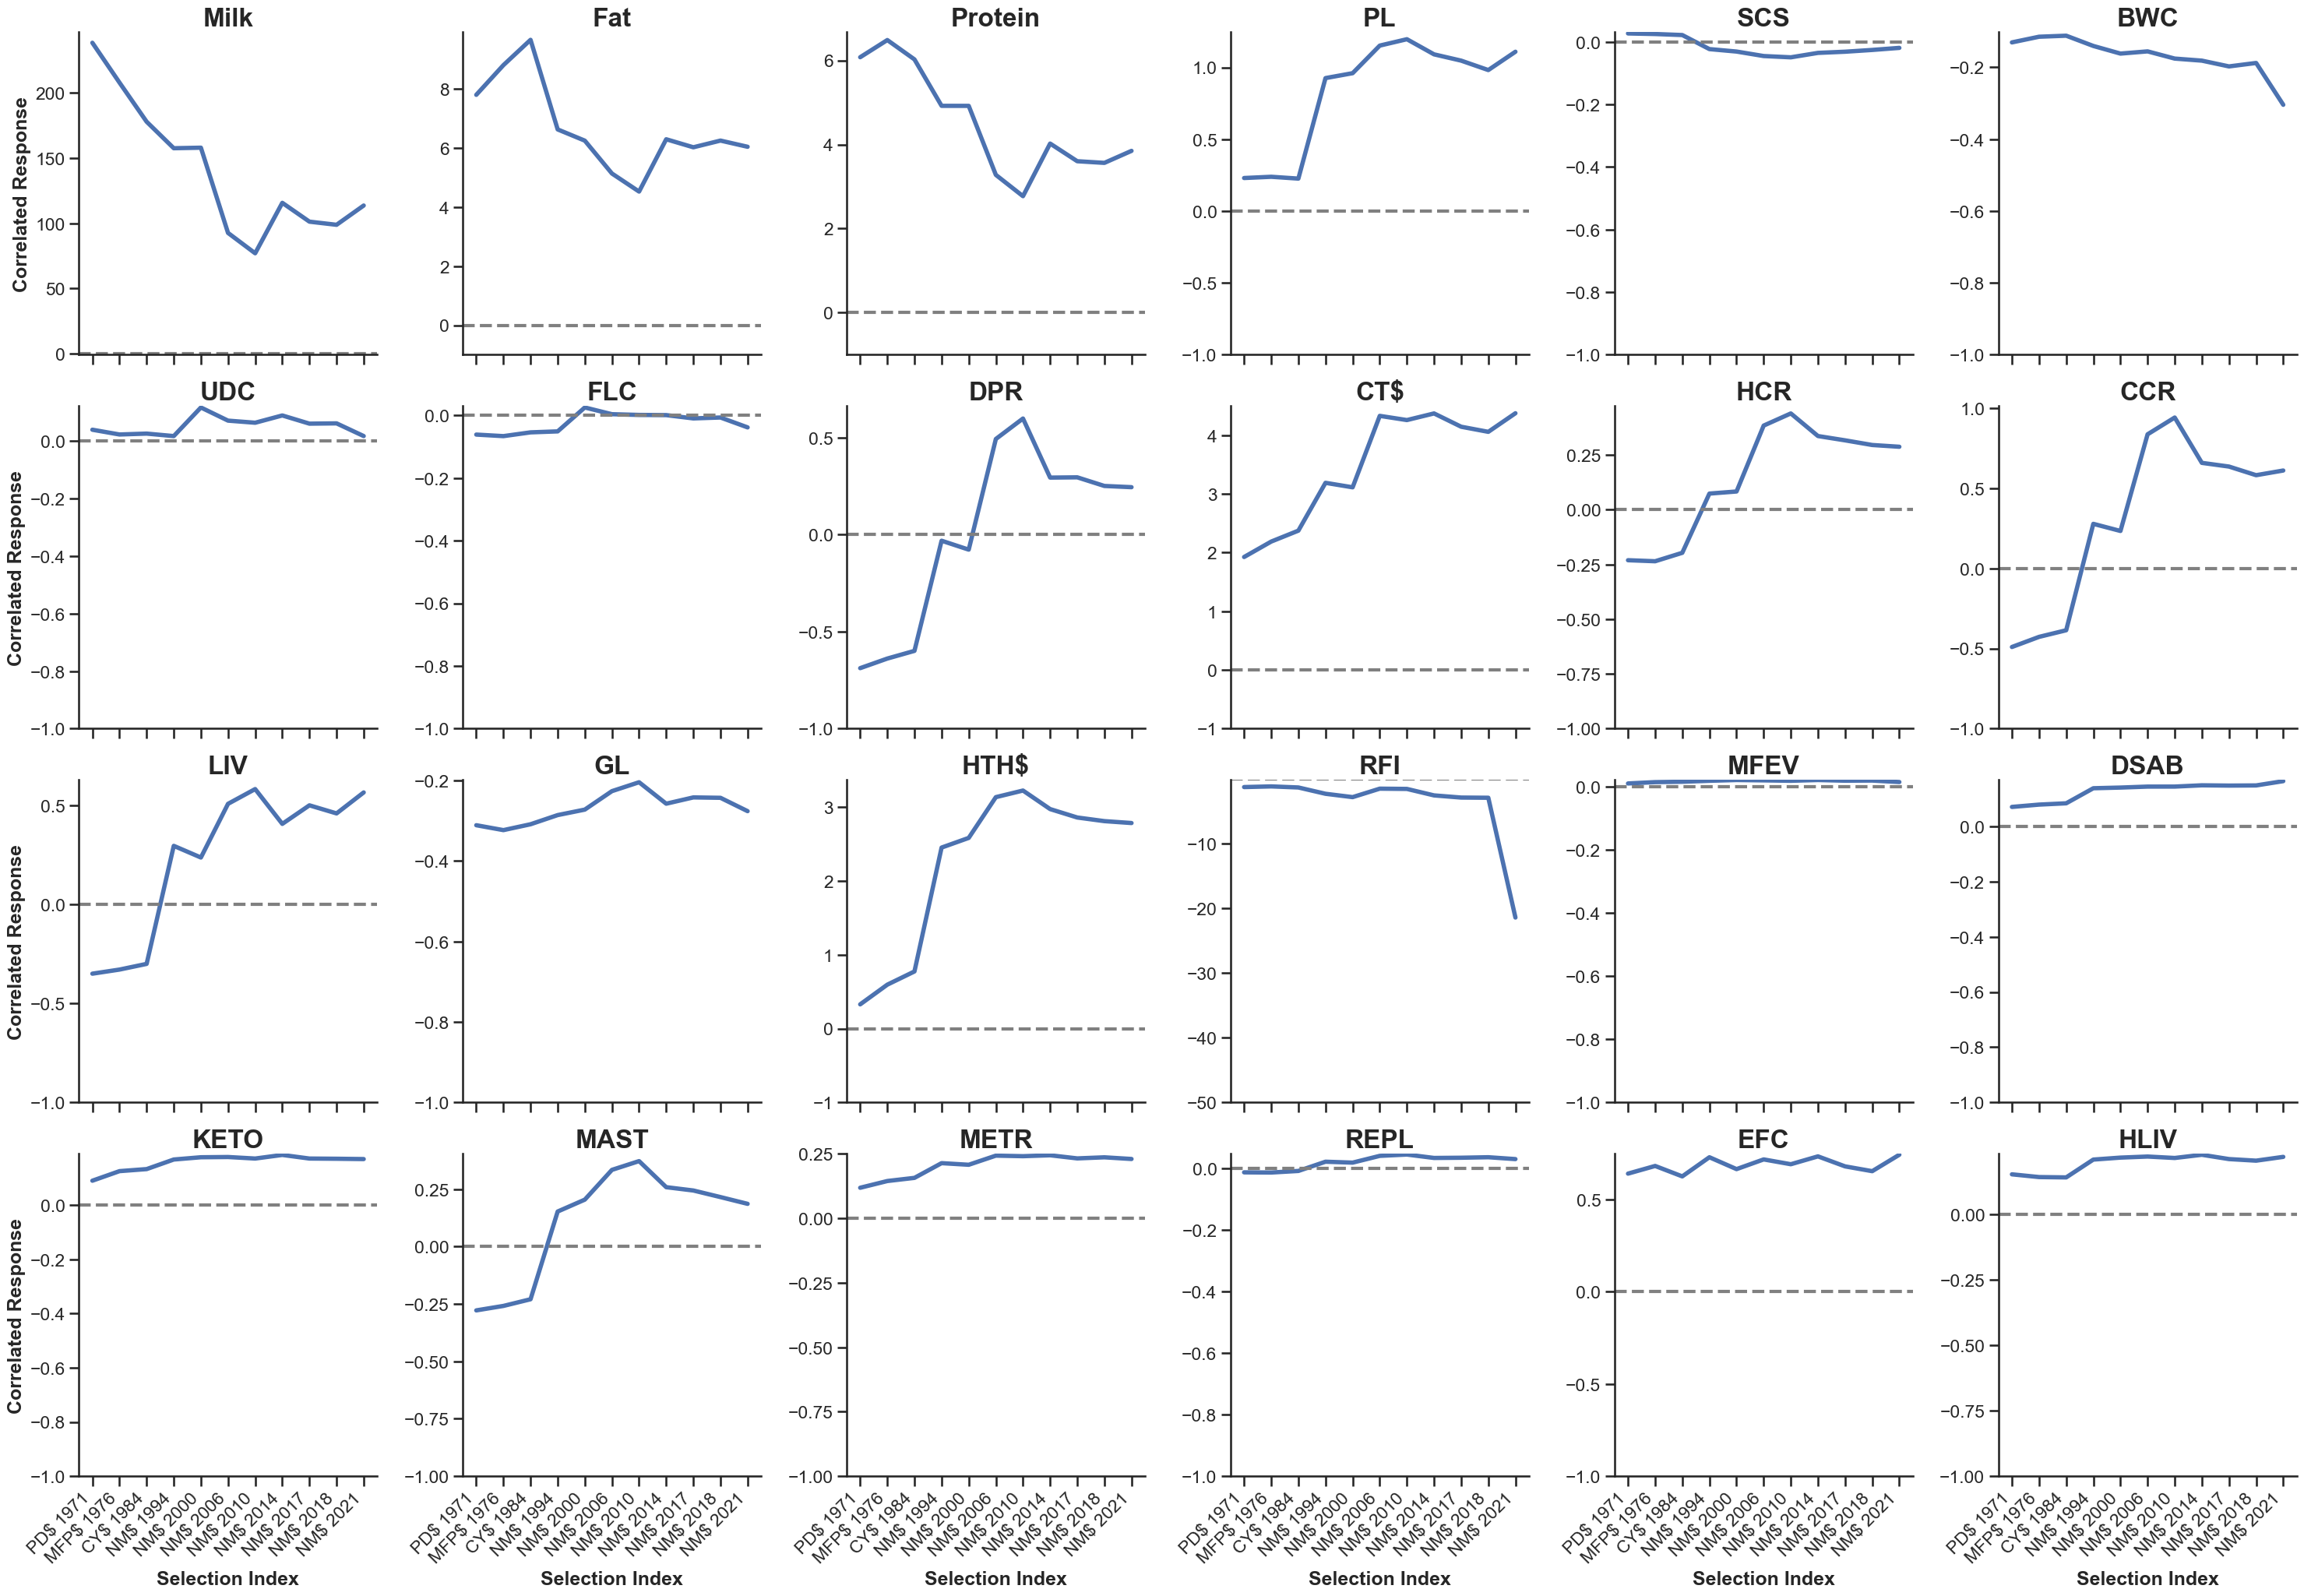

In [643]:
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")
r = sns.relplot(
    data=tall_response, x="Year", y="value",
    col="variable", kind="line", col_wrap=6,
    facet_kws=dict(sharey=False, sharex=True,),
    col_order= [ 'Milk', 'Fat', 'Protein', 'PL', 'SCS', 'BWC', 'UDC', 'FLC', 'DPR', 'CT$',
                 'HCR', 'CCR', 'LIV', 'GL', 'HTH$', 'RFI', 'MFEV', 'DSAB', 'KETO', 'MAST',
                 'METR', 'REPL', 'EFC', 'HLIV'],
    **{"linewidth": 4,},
)
# Make all figures share a common y-axis minimum.
r.set(ylim=(-1, None))
sns.set(font_scale = 2)

# I want to set all y-axes to a minimum of 0, except for RFI
axes = r.axes
axes[15].set_ylim(-50,)
for ax in axes:
    ax.axhline(0, ls='--', linewidth=3, color='gray')

# Label the axes
r.set_axis_labels("Selection Index", "Correlated Response", fontdict= {'fontweight':'bold'})
# Put the trait name as a title on each subplot.
r.set_titles("{col_name}", fontdict= {'fontweight':'bold'})
r.set_xticklabels(tall_response['Index Name'].unique(), rotation=45, ha="right")
#r.despine()
r.savefig('selection_response_all_traits.png', dpi=600, transparent=True, bbox_inches='tight')

In [126]:
sns.__version__

'0.13.2'

In [127]:
pd.__version__

'2.2.2'

In [128]:
np.__version__

'1.26.4'

In [129]:
!python -V

Python 3.11.7
